In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
import matplotlib as mlp 

In [73]:
mlp.rc('font',family='Monospace')
monofont = {'fontname':'Monospace'}

In [40]:
stats_df = pd.read_csv("cycles.csv")

In [41]:
ge_tags = ["GE_Solve_Base", "GE_Solve_Loop_Unroll", "GE_Solve_Naive_Vector"]
lu_tags = ["LU_Solve_Basic_C_Opts", "LU_Solve_Transposed", "LU_Solve_Transposed_Vector"]
tri_tags = ["Triangular_System_Solve_Base", "Triangular_System_Solve_Loop_Unroll", "Triangular_System_Solve_Vectorized"]

# the following should all be of same size:
sizes = [] 
ge_perfs_dict = {} # of form [tag : cycles] where |cycles| = |size|
lu_perfs_dict = {} # of form [tag : cycles] where |cycles| = |size|
tri_perfs_dict = {}

In [42]:
# collect_size
sizes = stats_df['size'].sort_values().unique()

In [43]:
def collect_perfs(tag):
    tagged_df = stats_df.loc[stats_df['tag'] == tag].sort_values('size')
    perfs = []
    for index, row in tagged_df.iterrows():
        perfs.append(row['cycles'])
        
    return perfs

In [44]:
for _, f_tag in enumerate(ge_tags):
    ge_perfs_dict[f_tag] = collect_perfs(f_tag)


In [45]:
for _, f_tag in enumerate(lu_tags):
    lu_perfs_dict[f_tag] = collect_perfs(f_tag)

In [46]:
for _, f_tag in enumerate(tri_tags):
    tri_perfs_dict[f_tag] = collect_perfs(f_tag)

/Users/xavier/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()


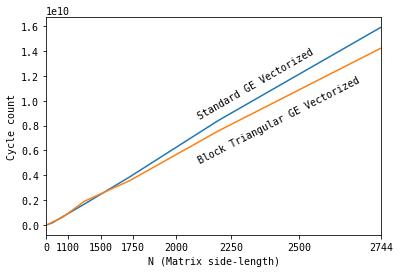

In [89]:
# for tag in ge_tags:
#     plt.plot(sizes, ge_perfs_dict[tag], label=tag)
# for tag in lu_tags:
#     plt.plot(sizes, lu_perfs_dict[tag], label=tag)
# for tag in tri_tags:
#     plt.plot(sizes, tri_perfs_dict[tag], label=tag)

plt.plot(sizes, ge_perfs_dict["GE_Solve_Naive_Vector"], label="Standard GE Vectorized")
plt.plot(sizes, tri_perfs_dict["Triangular_System_Solve_Vectorized"], label="Block Triangular GE Vectorized")

plt.xscale("function", functions=(lambda x: x**(3), lambda x:x**(1/3)))
plt.gca().set_xlim(0, 2744)
# plt.gca().set_ylim(0, 1.0e11)

# plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
        #    bbox_transform=plt.gcf().transFigure)
# plt.legend(bbox_to_anchor=(1.05, 1.00))

plt.xticks([0, 1100, 1500, 1750, 2000, 2250, 2500, 2744])

plt.text(2100, 0.85e10, "Standard GE Vectorized", rotation=30, **monofont)
plt.text(2100, 0.5e10, "Block Triangular GE Vectorized", rotation=27, **monofont)

plt.gca().set_xlabel("N (Matrix side-length)")
plt.gca().set_ylabel("Cycle count")

plt.savefig('./comp_tri_ge.pdf')

plt.show()